# Parametric data is data we often draw from (Gaussian) normal disribution
# Non parametric data is distribution of data is unknown
# Ex Ordinal, intervell data 
#     Real valued data with with not a well understood distribution
#     Almost parametric but with outliers, multiple peaks, shifts

# ##########____Normality test____###############

# Visual normality test
# QQ plot

In [5]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

## A P-P plot compares the empirical cumulative distribution function of a 
## data set with a specified theoretical cumulative distribution function
##  A Q-Q plot compares the quantiles of a data distribution with the quantiles of a 
## standardized theoretical distribution from a specified family of distributions.

In [6]:
np.random.seed(123)
x = np.random.normal(size=50)

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

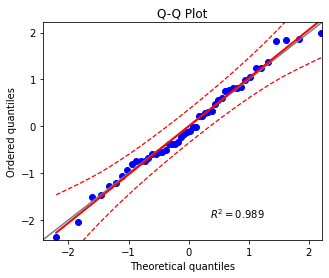

In [7]:
pg.qqplot(x, dist='norm')

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

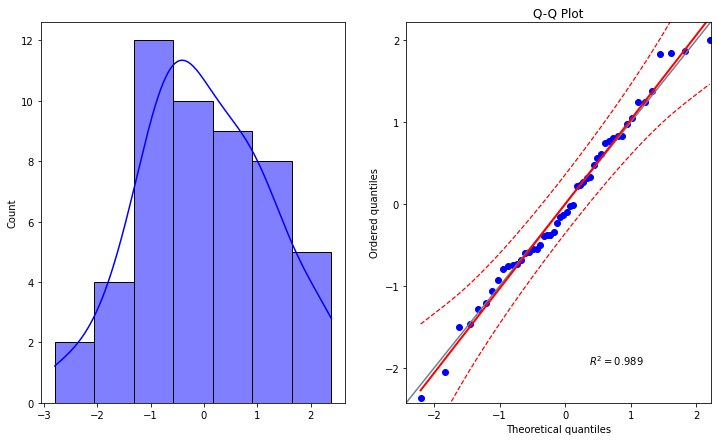

In [8]:
# plots for standard distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(x,kde=True, color ='blue',ax=ax[0])
pg.qqplot(x, dist='norm', ax=ax[1])

In [9]:
df = pd.read_csv('C:\\Users\\saikiran\\Desktop\\jpytr\\Inferential stats\\Data\\PO_Processing.csv')
df

,Processing_Time
0,49
1,46
2,56
3,56
4,68
...,...
95,36
96,37
97,12
98,42


In [10]:
pwd

'c:\\Users\\saikiran\\Desktop\\jpytr\\Inferential stats\\No parametric test'

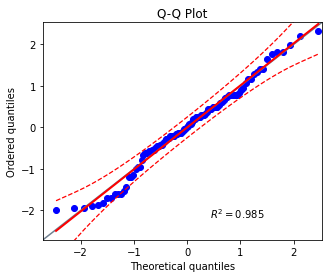

In [11]:
ax = pg.qqplot(df['Processing_Time'], dist='norm')
plt.show()

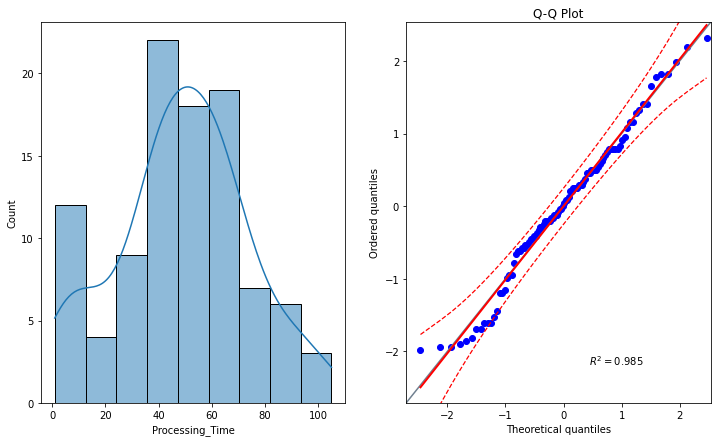

In [12]:
# plots for standard distribution
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(data = df, x = 'Processing_Time',kde=True, ax=ax[0])
ax = pg.qqplot(df['Processing_Time'], dist='norm',ax=ax[1])
plt.show()

# Statistical Normality tests

## 1. Shapiro wilk test

In [13]:
from scipy.stats import shapiro

stat, p = shapiro(df['Processing_Time'])
print('Statistic value', stat, 'p value', p)
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistic value 0.9803608655929565 p value 0.1418074667453766
Sample looks Gaussian (fail to reject H0)


In [14]:
pg.normality(df['Processing_Time'], method = 'shapiro', alpha=0.05)

,W,pval,normal
Processing_Time,0.980361,0.141807,True


# 2. D Agostino K square test

In [15]:
from scipy.stats import normaltest

stat, p = normaltest(df['Processing_Time'])
print('Statistic value', stat, 'p value', p)
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistic value 0.3396526182225922 p value 0.8438113662149449
Sample looks Gaussian (fail to reject H0)


In [16]:
pg.normality(df['Processing_Time'], method = 'normaltest', alpha=0.05)

,W,pval,normal
Processing_Time,0.339653,0.843811,True


# 3. Anderson darling test

In [25]:
from scipy.stats import anderson

result = anderson(df['Processing_Time'], dist='norm')
print('Statistic value', result.statistic)

p = 0

for sl, cv in zip(result.significance_level, result.critical_values):
	if result.statistic < cv:
		print('Data looks normal (fail to reject H0) with SI of ', sl)
	else:
		print('Data does not look normal (reject H0) with SI of ', sl)

Statistic value 0.48980872295177846
Data looks normal (fail to reject H0) with SI of  15.0
Data looks normal (fail to reject H0) with SI of  10.0
Data looks normal (fail to reject H0) with SI of  5.0
Data looks normal (fail to reject H0) with SI of  2.5
Data looks normal (fail to reject H0) with SI of  1.0


In [18]:
result = anderson(df['Processing_Time'])
print(result)

AndersonResult(statistic=0.48980872295177846, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
